## Import package

In [ ]:
import sys
sys.path.append('/ETGEMS-10.20/')
import ETGEMs_function_protain as etgf
from ETGEMs_function_protain import *
import pandas as pd
import cobra
import gurobipy
import json
import multiprocessing
import os
from multiprocessing import Pool
from sympy import subsets
import pandas as pd
import matplotlib.pyplot as plt
import re

## lysine 

In [ ]:
# The distribution of strategies involved in the experiment.
true_lysine = pd.read_excel('./ET_OptME/result/ET_Optme/result/true target.xlsx',sheet_name = 'Lysine')

In [6]:
len(true_lysine)

51

In [ ]:
#The strategies predicted by the ET_OptForce algorithm include those involved in the experiment.
df_optforce_down = pd.read_excel('./result/ET_Optme/result/lys/results_ET.xlsx',sheet_name='down')
df_optforce_up = pd.read_excel('./result/ET_Optme/result/lys/results_ET.xlsx',sheet_name='up')
df_optforce = pd.concat([df_optforce_down, df_optforce_up], axis=0, ignore_index=True)
df_optforce = df_optforce.drop('Unnamed: 0.1',axis=1)
df_optforce = df_optforce.drop('Unnamed: 0',axis=1)
df_optforce['product'] = 'L_lysine'
df_optforce_TP = df_optforce[(df_optforce['predict'] == 'TP')]

In [5]:
len(df_optforce_TP)

11

In [ ]:
# The strategies predicted by the T_OptForce algorithm include those involved in the experiment.
df_toptforce_down = pd.read_excel('./result/ET_Optme/result/lys/results_T.xlsx',sheet_name='down')
df_toptforce_up = pd.read_excel('./result/ET_Optme/result/lys/results_T.xlsx',sheet_name='up')
df_toptforce = pd.concat([df_toptforce_down, df_toptforce_up], axis=0, ignore_index=True)
df_toptforce = df_toptforce.drop('Unnamed: 0.1',axis=1)
df_toptforce = df_toptforce.drop('Unnamed: 0',axis=1)
df_toptforce['product'] = 'L_lysine'
df_toptforce_TP = df_toptforce[(df_toptforce['predict'] == 'TP')]

In [ ]:
# The strategies predicted by the ET_OptForce algorithm include those involved in the experiment.
df_soptforce_down = pd.read_excel('./result/ET_Optme/result/lys/results_S.xlsx',sheet_name='down')
df_soptforce_up = pd.read_excel('./result/ET_Optme/result/lys/results_S.xlsx',sheet_name='up')
df_soptforce = pd.concat([df_soptforce_down, df_soptforce_up], axis=0, ignore_index=True)
df_soptforce = df_soptforce.drop('Unnamed: 0.1',axis=1)
df_soptforce = df_soptforce.drop('Unnamed: 0',axis=1)
df_soptforce['product'] = 'L_lysine'
df_soptforce_TP = df_soptforce[(df_toptforce['predict'] == 'TP')]

/tmp/ipykernel_2123/4060041266.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_soptforce_TP = df_soptforce[(df_toptforce['predict'] == 'TP')]


In [ ]:
#The strategies predicted by the ET_FSEOF algorithm include those involved in the experiment.
df_fseof_down = pd.read_excel('./result/ET_Optme/result/F_lys/results_SET.xlsx',sheet_name='down')
df_fseof_up = pd.read_excel('./result/ET_Optme/result/F_lys/results_SET.xlsx',sheet_name='up')
df_fseof_down = df_fseof_down[df_fseof_down['mean_fluxs']>0.1]
df_fseof = pd.concat([df_fseof_down,df_fseof_up],axis = 0, ignore_index=True)
df_fseof = df_fseof.drop('Unnamed: 0.1',axis=1)
df_fseof = df_fseof.drop('Unnamed: 0',axis=1)
df_fseof['product'] = 'L_lysine'
df_fseof_TP = df_fseof[(df_fseof['predict'] == 'TP')]

In [ ]:
# s_fseof
df_fseof_s_down = pd.read_excel('./result/ET_Optme/result/F_lys/results_S.xlsx',sheet_name='down')
df_fseof_s_up = pd.read_excel('./result/ET_Optme/result/F_lys/results_S.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_s = pd.concat([df_fseof_s_down,df_fseof_s_up],axis = 0, ignore_index=True)
df_fseof_s = df_fseof_s.drop('Unnamed: 0.1',axis=1)
df_fseof_s = df_fseof_s.drop('Unnamed: 0',axis=1)
df_fseof_s['product'] = 'L_lysine'
df_fseof_s_TP = df_fseof_s[(df_fseof_s['predict'] == 'TP')]

In [ ]:

# t_fseof
df_fseof_st_down = pd.read_excel('./result/ET_Optme/result/F_lys/results_ST.xlsx',sheet_name='down')
df_fseof_st_up = pd.read_excel('./result/ET_Optme/result/F_lys/results_ST.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_st = pd.concat([df_fseof_st_down,df_fseof_st_up],axis = 0, ignore_index=True)
df_fseof_st = df_fseof_st.drop('Unnamed: 0.1',axis=1)
df_fseof_st = df_fseof_st.drop('Unnamed: 0',axis=1)
df_fseof_st['product'] = 'L_lysine'
df_fseof_st_TP = df_fseof_st[(df_fseof_st['predict'] == 'TP')]

In [12]:
# All strategies predicted by the ET_OptME_Int algorithm
common_lysgenes = pd.merge(df_fseof[['gene']], df_optforce[['gene']], on='gene')
common_genes_lysdf = pd.merge(df_fseof, df_optforce, on='gene', suffixes=('_fseof', '_optforce'))
result_lysdf = common_genes_lysdf[['gene', 'predict_fseof', 'enzyme_fseof','predict_optforce','manipulations_optforce','manipulations_fseof']]

# The strategies predicted by the ET_OptME_Int algorithm include those involved in the experiment.
TP_result_lysdf = result_lysdf[(result_lysdf['predict_optforce'] == 'TP') | (result_lysdf['predict_fseof'] == 'TP')]

In [13]:

# All strategies predicted by the ET_OptME_Un algorithm
merged_lysdf = pd.merge(df_fseof, df_optforce, on='gene', how='outer', suffixes=('_fseof', '_optforce'))
sum_lysdf = merged_lysdf[['gene','manipulations_optforce','manipulations_fseof','enzyme_optforce', 'predict_optforce' ,'predict_fseof']]

# The strategies predicted by the ET_OptME_Un algorithm include those involved in the experiment.
TP_sum_lysdf = sum_lysdf[(sum_lysdf['predict_optforce'] == 'TP') | (sum_lysdf['predict_fseof'] == 'TP')]

In [14]:

# Calculate the statistical count
TP_lysintersection = len(TP_result_lysdf)
all_lysintersection = len(result_lysdf)
all_lyssum = len(sum_lysdf)
TP_lyssum = len(TP_sum_lysdf)

In [15]:
alltrue_lys = len(true_lysine)
all_target_etlys = len(df_optforce)
all_target_slys = len(df_soptforce)
all_target_tlys = len(df_toptforce)
all_target_etflys = len(df_fseof)
all_target_sflys = len(df_fseof_s)
all_target_stflys = len(df_fseof_st)
tp_slys = len(df_soptforce_TP)
tp_tlys = len(df_toptforce_TP)
tp_etlys = len(df_optforce_TP)
tp_eflys = len(df_fseof_TP)
tp_sflys = len(df_fseof_s_TP)
tp_stflys = len(df_fseof_st_TP)

In [16]:

# Calculate the performance metrics
et_minprecison_lys = tp_etlys/all_target_etlys
t_minprecison_lys = tp_tlys/all_target_tlys
s_minprecison_lys = tp_slys/all_target_slys
etf_minprecison_lys = tp_eflys/all_target_etflys
sf_minprecison_lys = tp_sflys/all_target_sflys
st_minprecision_lys = tp_stflys/all_target_stflys
et_accuracy_lys = tp_etlys/alltrue_lys
etf_accuracy_lys = tp_eflys/alltrue_lys
stf_accuracy_lys= tp_stflys/alltrue_lys
sf_accuracy_lys = tp_slys/alltrue_lys
t_accuracy_lys = tp_tlys/alltrue_lys
s_accuracy_lys = tp_slys/alltrue_lys
etmi_accuracy_lys = TP_lysintersection/alltrue_lys
etmi_minprecison_lys = TP_lysintersection/all_lysintersection
etms_accuracy_lys = TP_lyssum/alltrue_lys
erms_minprecision_lys = TP_lyssum/all_lyssum


In [20]:
etf_minprecison_lys



0.25806451612903225

In [21]:
all_target_factory1 = 32
all_target_factory2 = 27
all_target_factory3 = 13
true_factory1 = 12
true_factory2 = 9
true_factory3 = 5

In [22]:
factory1_minprecison = true_factory1 / all_target_factory1
factory2_minprecison = true_factory2 / all_target_factory2
factory3_minprecison = true_factory3 / all_target_factory3
factory1_accuracy = true_factory1 / alltrue_lys
factory2_accuracy = true_factory2 / alltrue_lys
factory3_accuracy = true_factory3 / alltrue_lys

In [29]:
factory3_accuracy

0.09803921568627451

In [37]:
factory3_minprecison

0.38461538461538464

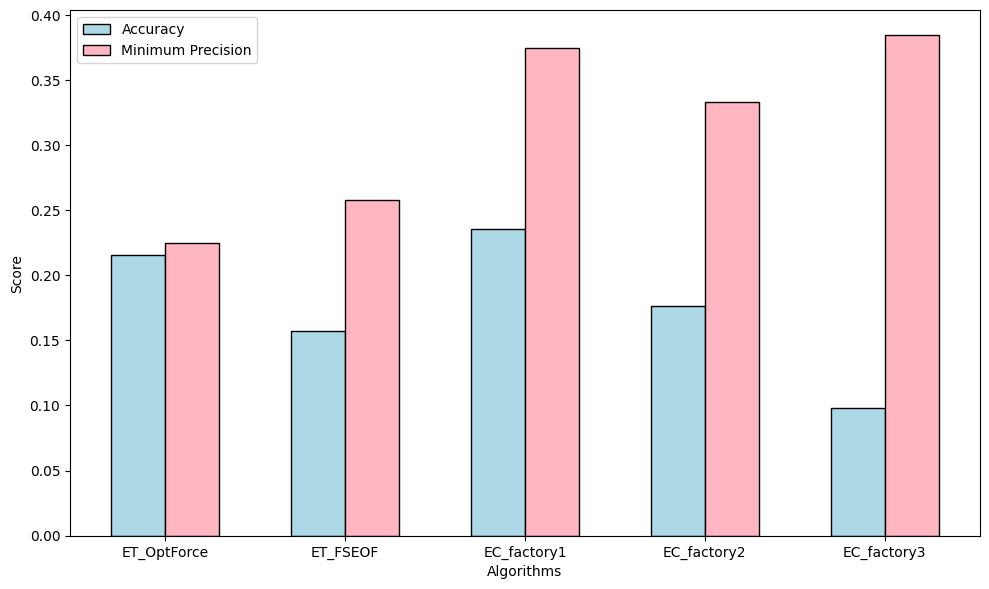

In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 5  
Accuracy = [et_accuracy_lys, etf_accuracy_lys, factory1_accuracy, factory2_accuracy,factory3_accuracy]
Precision = [et_minprecison_lys, etf_minprecison_lys, factory1_minprecison, factory2_minprecison,factory3_minprecison]

ind = np.arange(N) 
width = 0.3 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind - width/2, Accuracy, width, color='lightblue', edgecolor='black', label='Accuracy')
rects2 = ax.bar(ind + width/2, Precision, width, color='lightpink', edgecolor='black', label='Minimum Precision')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('ET_OptForce', 'ET_FSEOF', 'EC_factory1', 'EC_factory2','EC_factory3'))
ax.legend()

plt.tight_layout()
# plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/accuracy_precision_comparisonint.svg', format='svg')
plt.show()

## val

In [ ]:
# The distribution of strategies involved in the experiment.
true_valine = pd.read_excel('./ET_OptME/result/ET_Optme/result/true target.xlsx',sheet_name = 'L_Valine')

In [ ]:

#The strategies predicted by the ET_OptForce algorithm include those involved in the experiment.
df_optforce_valdown = pd.read_excel('./result/ET_Optme/result/val/results_ET.xlsx',sheet_name='down')
df_optforce_valup = pd.read_excel('./result/ET_Optme/result/val/results_ET.xlsx',sheet_name='up')
df_optforce_val = pd.concat([df_optforce_valdown, df_optforce_valup], axis=0, ignore_index=True)
df_optforce_val = df_optforce_val.drop('Unnamed: 0.1',axis=1)
df_optforce_val = df_optforce_val.drop('Unnamed: 0',axis=1)
df_optforce_val['product'] = 'L_Valine'
df_optforce_valTP = df_optforce_val[(df_optforce_val['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the T_OptForce algorithm include those involved in the experiment.
df_toptforce_valdown = pd.read_excel('./result/ET_Optme/result/val/results_T.xlsx',sheet_name='down')
df_toptforce_valup = pd.read_excel('./result/ET_Optme/result/val/results_T.xlsx',sheet_name='up')
df_toptforce_val = pd.concat([df_toptforce_valdown, df_toptforce_valup], axis=0, ignore_index=True)
df_toptforce_val = df_toptforce_val.drop('Unnamed: 0.1',axis=1)
df_toptforce_val = df_toptforce_val.drop('Unnamed: 0',axis=1)
df_toptforce_val['product'] = 'L_Valine'
df_toptforce_valTP = df_toptforce_val[(df_toptforce_val['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the OptForce algorithm include those involved in the experiment.
df_soptforce_valdown = pd.read_excel('./result/ET_Optme/result/val/results_S.xlsx',sheet_name='down')
df_soptforce_valup = pd.read_excel('./result/ET_Optme/result/val/results_S.xlsx',sheet_name='up')
df_soptforce_val = pd.concat([df_soptforce_valdown, df_soptforce_valup], axis=0, ignore_index=True)
df_soptforce_val = df_soptforce_val.drop('Unnamed: 0.1',axis=1)
df_soptforce_val = df_soptforce_val.drop('Unnamed: 0',axis=1)
df_soptforce_val['product'] = 'L_Valine'
df_soptforce_valTP = df_soptforce_val[(df_soptforce_val['predict'] == 'TP')]

In [ ]:

#The strategies predicted by the ET_FSEOF algorithm include those involved in the experiment.
df_fseof_down_val = pd.read_excel('./result/ET_Optme/result/F_val/results_SET.xlsx',sheet_name='down')
df_fseof_up_val = pd.read_excel('./result/ET_Optme/result/F_val/results_SET.xlsx',sheet_name='up')
df_fseof_down_val = df_fseof_down_val[df_fseof_down_val['mean_fluxs']>0.1]
df_fseof_val = pd.concat([df_fseof_down_val,df_fseof_up_val],axis = 0, ignore_index=True)
df_fseof_val = df_fseof_val.drop('Unnamed: 0.1',axis=1)
df_fseof_val = df_fseof_val.drop('Unnamed: 0',axis=1)
df_fseof_val['product'] = 'L_Valine'
df_fseof_valTP = df_fseof_val[(df_fseof_val['predict'] == 'TP')]

In [ ]:
# s_fseof
df_fseof_s_down_val = pd.read_excel('./result/ET_Optme/result/F_val/results_S.xlsx',sheet_name='down')
df_fseof_s_up_val = pd.read_excel('./result/ET_Optme/result/F_val/results_S.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_s_val = pd.concat([df_fseof_s_down_val,df_fseof_s_up_val],axis = 0, ignore_index=True)
df_fseof_s_val = df_fseof_s_val.drop('Unnamed: 0.1',axis=1)
df_fseof_s_val = df_fseof_s_val.drop('Unnamed: 0',axis=1)
df_fseof_s_val['product'] = 'L_Valine'
df_fseof_s_val_TP = df_fseof_s_val[(df_fseof_s_val['predict'] == 'TP')]


In [ ]:

# t_fseof
df_fseof_st_down_val = pd.read_excel('./result/ET_Optme/result/F_val/results_ST.xlsx',sheet_name='down')
df_fseof_st_up_val = pd.read_excel('./result/ET_Optme/result/F_val/results_ST.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_st_val = pd.concat([df_fseof_st_down_val,df_fseof_st_up_val],axis = 0, ignore_index=True)
df_fseof_st_val = df_fseof_st_val.drop('Unnamed: 0.1',axis=1)
df_fseof_st_val = df_fseof_st_val.drop('Unnamed: 0',axis=1)
df_fseof_st_val['product'] = 'L_Valine'
df_fseof_st_val_TP = df_fseof_st_val[(df_fseof_st_val['predict'] == 'TP')]

## ET-OptME intersection

In [24]:

# All strategies predicted by the ET_OptME_Int algorithm
common_genes = pd.merge(df_fseof_val[['gene']], df_optforce_val[['gene']], on='gene')
common_genes_valdf = pd.merge(df_fseof_val, df_optforce_val, on='gene', suffixes=('_fseof', '_optforce'))
result_valdf = common_genes_valdf[['gene', 'predict_fseof', 'enzyme_fseof','predict_optforce','manipulations_optforce','manipulations_fseof']]

In [25]:

# The strategies predicted by the ET_OptME_Int algorithm include those involved in the experiment.
TP_result_valdf = result_valdf[(result_valdf['predict_optforce'] == 'TP') | (result_valdf['predict_fseof'] == 'TP')]

## ET-OpME sum

In [26]:

# All strategies predicted by the ET_OptME_Un algorithm
merged_valdf = pd.merge(df_fseof_val, df_optforce_val, on='gene', how='outer', suffixes=('_fseof', '_optforce'))
sum_valdf = merged_valdf[['gene','manipulations_optforce','manipulations_fseof','enzyme_optforce', 'predict_optforce' ,'predict_fseof']]

In [27]:

# The strategies predicted by the ET_OptME_Un algorithm include those involved in the experiment.
TP_sum_valdf = sum_valdf[(sum_valdf['predict_optforce'] == 'TP') | (sum_valdf['predict_fseof'] == 'TP')]

In [28]:

# Calculate the statistical count
TP_valintersection = len(TP_result_valdf)
all_valintersection = len(result_valdf)
all_valsum = len(sum_valdf)
TP_valsum = len(TP_sum_valdf)

In [29]:
alltrue_val = len(true_valine)
all_target_etval = len(df_optforce_val)
all_target_sval = len(df_soptforce_val)
all_target_tval = len(df_toptforce_val)
all_target_etfval = len(df_fseof_val)
all_target_sfval = len(df_fseof_s_val)
all_target_stfval = len(df_fseof_st_val)
tp_sval = len(df_soptforce_valTP)
tp_tval = len(df_toptforce_valTP)
tp_etval = len(df_optforce_valTP)
tp_efval = len(df_fseof_valTP)
tp_sfval = len(df_fseof_s_val_TP)
tp_stfval = len(df_fseof_st_val_TP)

In [30]:

# Calculate the performance metrics
et_minprecison_val = tp_etval/all_target_etval
# 0.228
etf_minprecison_val = tp_efval/all_target_etfval
sf_minprecision_val = tp_sfval/all_target_sfval
stf_minprecision_val = tp_stfval/all_target_stfval
# 0.13
t_minprecison_val = tp_tval/all_target_tval
# 0.09
s_minprecison_val = tp_sval/all_target_sval
# 0.44
et_accuracy_val = tp_etval/alltrue_val
# 0.2
t_accuracy_val = tp_tval/alltrue_val
# 0.08
s_accuracy_val = tp_sval/alltrue_val
# 0.32
etf_accuracy_val = tp_efval/alltrue_val
sf_accuracy_val = tp_sfval/alltrue_val
stf_accuracy_val = tp_stfval/alltrue_val
etmi_accuracy_val = TP_valintersection/alltrue_val
etmi_minprecison_val = TP_valintersection/all_valintersection
etms_accuracy_val = TP_valsum/alltrue_val
erms_minprecision_val = TP_valsum/all_valsum

## glu

In [ ]:
# The distribution of strategies involved in the experiment.
true_glutamate = pd.read_excel('./result/ET_Optme/result/true target.xlsx',sheet_name = 'L-Glutamate')

In [ ]:

#The strategies predicted by the ET_OptForce algorithm include those involved in the experiment.
df_optforce_gludown = pd.read_excel('./result/ET_Optme/result/glu/results_ET.xlsx',sheet_name='down')
df_optforce_gluup = pd.read_excel('./result/ET_Optme/result/glu/results_ET.xlsx',sheet_name='up')
df_optforce_glu = pd.concat([df_optforce_gludown, df_optforce_gluup], axis=0, ignore_index=True)
df_optforce_glu = df_optforce_glu.drop('Unnamed: 0.1',axis=1)
df_optforce_glu = df_optforce_glu.drop('Unnamed: 0',axis=1)
df_optforce_glu['product'] = 'L-Glutamate'
df_optforce_gluTP = df_optforce_glu[(df_optforce_glu['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the T_OptForce algorithm include those involved in the experiment.
df_toptforce_gludown = pd.read_excel('./result/ET_Optme/result/glu/results_T.xlsx',sheet_name='down')
df_toptforce_gluup = pd.read_excel('./result/ET_Optme/result/glu/results_T.xlsx',sheet_name='up')
df_toptforce_glu = pd.concat([df_toptforce_gludown, df_toptforce_gluup], axis=0, ignore_index=True)
df_toptforce_glu = df_toptforce_glu.drop('Unnamed: 0.1',axis=1)
df_toptforce_glu = df_toptforce_glu.drop('Unnamed: 0',axis=1)
df_toptforce_glu['product'] = 'L-Glutamate'
df_toptforce_gluTP = df_toptforce_glu[(df_toptforce_glu['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the OptForce algorithm include those involved in the experiment.
df_soptforce_gludown = pd.read_excel('./result/ET_Optme/result/glu/results_S.xlsx',sheet_name='down')
df_soptforce_gluup = pd.read_excel('./result/ET_Optme/result/glu/results_S.xlsx',sheet_name='up')
df_soptforce_glu = pd.concat([df_soptforce_gludown, df_soptforce_gluup], axis=0, ignore_index=True)
df_soptforce_glu = df_soptforce_glu.drop('Unnamed: 0.1',axis=1)
df_soptforce_glu = df_soptforce_glu.drop('Unnamed: 0',axis=1)
df_soptforce_glu['product'] = 'L-Glutamate'
df_soptforce_gluTP = df_soptforce_glu[(df_soptforce_glu['predict'] == 'TP')]

In [ ]:

#The strategies predicted by the ET_FSEOF algorithm include those involved in the experiment.
df_fseof_down_glu = pd.read_excel('./ET_OptME/result/ET_Optme/result/F_glu/results_SET.xlsx',sheet_name='down')
df_fseof_up_glu = pd.read_excel('./ET_OptME/result/ET_Optme/result/F_glu/results_SET.xlsx',sheet_name='up')
df_fseof_down_glu = df_fseof_down_glu[df_fseof_down_glu['mean_fluxs']>0.1]
df_fseof_glu = pd.concat([df_fseof_down_glu,df_fseof_up_glu],axis = 0, ignore_index=True)
df_fseof_glu = df_fseof_glu.drop('Unnamed: 0.1',axis=1)
df_fseof_glu = df_fseof_glu.drop('Unnamed: 0',axis=1)
df_fseof_glu['product'] = 'L-Glutamate'
df_fseof_gluTP = df_fseof_glu[(df_fseof_glu['predict'] == 'TP')]

In [ ]:
# s_fseof
df_fseof_s_down_glu = pd.read_excel('./result/ET_Optme/result/F_glu/results_S.xlsx',sheet_name='down')
df_fseof_s_up_glu = pd.read_excel('./result/ET_Optme/result/F_glu/results_S.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_s_glu = pd.concat([df_fseof_s_down_glu,df_fseof_s_up_glu],axis = 0, ignore_index=True)
df_fseof_s_glu = df_fseof_s_glu.drop('Unnamed: 0.1',axis=1)
df_fseof_s_glu = df_fseof_s_glu.drop('Unnamed: 0',axis=1)
df_fseof_s_glu['product'] = 'L-Glutamate'
df_fseof_s_glu_TP = df_fseof_s_glu[(df_fseof_s_glu['predict'] == 'TP')]

In [37]:
df_fseof_s_glu_TP

,reaction,product = 0.0,product = 0.52,product = 1.04,product = 1.56,product = 2.08,product = 2.59,product = 3.11,product = 3.63,product = 4.15,product = 4.67,gpr,manipulation,mean_flux,result,equation,enzyme,predict,Unnamed: 19,product
55,ASPK,0.365589,0.334944,0.304298,0.273653,0.243007,0.209612,0.202968,0.137298,0.071627,0.005958,Cgl0251,down,0.365589,0.360,asp__L_c + atp_c --> 4pasp_c + adp_c,lysC,TP,NaN,L-Glutamate
56,DAPDH,0.109653,0.100461,0.091270,0.082078,0.072886,0.062870,0.051132,0.034588,0.018045,0.001501,Cgl2617,down,0.109653,0.108,2.0 h_c + nadph_c + nh4_c + thdp_c --> 26dap__...,ddh,TP,NaN,L-Glutamate
57,DHDPRy,0.109653,0.100461,0.091270,0.082078,0.072886,0.062870,0.051132,0.034588,0.018045,0.001501,Cgl1973,down,0.109653,0.108,23dhdp_c + h_c + nadph_c --> nadp_c + thdp_c,dapB,TP,NaN,L-Glutamate


In [ ]:

# t_fseof
df_fseof_st_down_glu = pd.read_excel('./result/ET_Optme/result/F_glu/results_ST.xlsx',sheet_name='down')
df_fseof_st_up_glu = pd.read_excel('./result/ET_Optme/result/F_glu/results_ST.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_st_glu = pd.concat([df_fseof_st_down_glu,df_fseof_st_up_glu],axis = 0, ignore_index=True)
df_fseof_st_glu = df_fseof_st_glu.drop('Unnamed: 0.1',axis=1)
df_fseof_st_glu = df_fseof_st_glu.drop('Unnamed: 0',axis=1)
df_fseof_st_glu['product'] = 'L-Glutamate'
df_fseof_st_glu_TP = df_fseof_st_glu[(df_fseof_st_glu['predict'] == 'TP')]

In [39]:

# All strategies predicted by the ET_OptME_Int algorithm
common_glugenes = pd.merge(df_fseof[['gene']], df_optforce[['gene']], on='gene')
common_genes_gludf = pd.merge(df_fseof, df_optforce, on='gene', suffixes=('_fseof', '_optforce'))
result_gludf = common_genes_gludf[['gene', 'predict_fseof', 'enzyme_fseof','predict_optforce','manipulations_optforce','manipulations_fseof']]
# The strategies predicted by the ET_OptME_Int algorithm include those involved in the experiment.
TP_result_gludf = result_gludf[(result_gludf['predict_optforce'] == 'TP') | (result_gludf['predict_fseof'] == 'TP')]

In [40]:

# All strategies predicted by the ET_OptME_Un algorithm
merged_gludf = pd.merge(df_fseof, df_optforce, on='gene', how='outer', suffixes=('_fseof', '_optforce'))
sum_gludf = merged_gludf[['gene','manipulations_optforce','manipulations_fseof','enzyme_optforce', 'predict_optforce' ,'predict_fseof']]
# The strategies predicted by the ET_OptME_Un algorithm include those involved in the experiment.
TP_sum_gludf = sum_gludf[(sum_gludf['predict_optforce'] == 'TP') | (sum_gludf['predict_fseof'] == 'TP')]


In [41]:

# Calculate the statistical count
TP_gluintersection = len(TP_result_gludf)
all_gluintersection = len(result_gludf)
all_glusum = len(sum_gludf)
TP_glusum = len(TP_sum_gludf)

In [42]:
alltrue_glu = len(true_glutamate)
all_target_etglu = len(df_optforce_glu)
all_target_sglu = len(df_soptforce_glu)
all_target_tglu = len(df_toptforce_glu)
all_target_etfglu = len(df_fseof_glu)
all_target_sfglu = len(df_fseof_s_glu)
all_target_stfglu = len(df_fseof_st_glu)
tp_sglu = len(df_soptforce_gluTP)
tp_tglu = len(df_toptforce_gluTP)
tp_etglu = len(df_optforce_gluTP)
tp_tfglu = len(df_fseof_gluTP)
tp_sfglu = len(df_fseof_s_glu_TP)
tp_stfglu = len(df_fseof_st_glu_TP)


In [43]:

# Calculate the performance metrics
et_minprecison_glu = tp_etglu/all_target_etglu
# 0.17
etf_minprecison_glu = tp_tfglu/all_target_etfglu
sf_minprecision_glu = tp_sfglu/all_target_sfglu
stf_minprecision_glu = tp_stfglu/all_target_stfglu
# # 0.03
t_minprecison_glu = tp_tglu/all_target_tglu
# # 0.04
s_minprecison_glu = tp_sglu/all_target_sglu
# # 0.22
et_accuracy_glu = tp_etglu/alltrue_glu
# 0.037
t_accuracy_glu = tp_tglu/alltrue_glu
# # 0.037
s_accuracy_glu = tp_sglu/alltrue_glu
# # 0.185
etf_accuracy_glu = tp_tfglu/alltrue_glu
sf_accuracy_glu = tp_sfglu/alltrue_glu
stf_accuracy_glu = tp_stfglu/alltrue_glu
etmi_accuracy_glu = TP_gluintersection/alltrue_glu
etmi_minprecison_glu = TP_gluintersection/all_gluintersection
etms_accuracy_glu = TP_glusum/alltrue_glu
erms_minprecision_glu = TP_glusum/all_glusum

In [44]:
erms_minprecision_glu

0.22807017543859648

## ile

In [ ]:
# The distribution of strategies involved in the experiment.
true_Isoleucine = pd.read_excel('./result/ET_Optme/result/true target.xlsx',sheet_name = 'L_Isoleucine')

In [ ]:

#The strategies predicted by the ET_OptForce algorithm include those involved in the experiment.
df_optforce_iledown = pd.read_excel('./result/ET_Optme/result/ile/results_SET.xlsx',sheet_name='down')
df_optforce_ileup = pd.read_excel('./result/ET_Optme/result/ile/results_SET.xlsx',sheet_name='up')
df_optforce_ile = pd.concat([df_optforce_iledown, df_optforce_ileup], axis=0, ignore_index=True)
df_optforce_ile = df_optforce_ile.drop('Unnamed: 0.1',axis=1)
df_optforce_ile = df_optforce_ile.drop('Unnamed: 0',axis=1)
df_optforce_ile['product'] = 'L_Isoleucine'
df_optforce_ileTP = df_optforce_ile[(df_optforce_ile['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the T_OptForce algorithm include those involved in the experiment.
df_toptforce_iledown = pd.read_excel('./result/ET_Optme/result/ile/results_T.xlsx',sheet_name='down')
df_toptforce_ileup = pd.read_excel('./result/ET_Optme/result/ile/results_T.xlsx',sheet_name='up')
df_toptforce_ile = pd.concat([df_toptforce_iledown, df_toptforce_ileup], axis=0, ignore_index=True)
df_toptforce_ile = df_toptforce_ile.drop('Unnamed: 0.1',axis=1)
df_toptforce_ile = df_toptforce_ile.drop('Unnamed: 0',axis=1)
df_toptforce_ile['product'] = 'L_Isoleucine'
df_toptforce_ileTP = df_toptforce_ile[(df_toptforce_ile['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the OptForce algorithm include those involved in the experiment
df_soptforce_iledown = pd.read_excel('./result/ET_Optme/result/ile/results_S.xlsx',sheet_name='down')
df_soptforce_ileup = pd.read_excel('./result/ET_Optme/result/ile/results_S.xlsx',sheet_name='up')
df_soptforce_ile = pd.concat([df_soptforce_iledown, df_soptforce_ileup], axis=0, ignore_index=True)
df_soptforce_ile = df_soptforce_ile.drop('Unnamed: 0.1',axis=1)
df_soptforce_ile = df_soptforce_ile.drop('Unnamed: 0',axis=1)
df_soptforce_ile['product'] = 'L_Isoleucine'
df_soptforce_ileTP = df_soptforce_ile[(df_soptforce_ile['predict'] == 'TP')]

In [ ]:

#The strategies predicted by the ET_FSEOF algorithm include those involved in the experiment.
df_fseof_down_ile = pd.read_excel('./result/ET_Optme/result/F_ile/results_SET.xlsx',sheet_name='down')
df_fseof_up_ile = pd.read_excel('./result/ET_Optme/result/F_ile/results_SET.xlsx',sheet_name='up')
df_fseof_down_ile = df_fseof_down_ile[df_fseof_down_ile['mean_fluxs']>0.1]
df_fseof_ile = pd.concat([df_fseof_down_ile,df_fseof_up_ile],axis = 0, ignore_index=True)
df_fseof_ile = df_fseof_ile.drop('Unnamed: 0.1',axis=1)
df_fseof_ile = df_fseof_ile.drop('Unnamed: 0',axis=1)
df_fseof_ile['product'] = 'L_Isoleucine'
df_fseof_ileTP = df_fseof_ile[(df_fseof_ile['predict'] == 'TP')]

In [ ]:
# s_fseof
df_fseof_s_down_ile = pd.read_excel('./result/ET_Optme/result/F_ile/results_S.xlsx',sheet_name='down')
df_fseof_s_up_ile = pd.read_excel('./result/ET_Optme/result/F_ile/results_S.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_s_ile = pd.concat([df_fseof_s_down_ile,df_fseof_s_up_ile],axis = 0, ignore_index=True)
df_fseof_s_ile = df_fseof_s_ile.drop('Unnamed: 0.1',axis=1)
df_fseof_s_ile = df_fseof_s_ile.drop('Unnamed: 0',axis=1)
df_fseof_s_ile['product'] = 'L_Isoleucine'
df_fseof_s_ile_TP = df_fseof_s_ile[(df_fseof_s_ile['predict'] == 'TP')]

In [ ]:

# t_fseof
df_fseof_st_down_ile = pd.read_excel('./result/ET_Optme/result/F_ile/results_ST.xlsx',sheet_name='down')
df_fseof_st_up_ile = pd.read_excel('./result/ET_Optme/result/F_ile/results_ST.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_st_ile = pd.concat([df_fseof_st_down_ile,df_fseof_st_up_ile],axis = 0, ignore_index=True)
df_fseof_st_ile = df_fseof_st_ile.drop('Unnamed: 0.1',axis=1)
df_fseof_st_ile = df_fseof_st_ile.drop('Unnamed: 0',axis=1)
df_fseof_st_ile['product'] = 'L_Isoleucine'
df_fseof_st_ile_TP = df_fseof_st_ile[(df_fseof_st_ile['predict'] == 'TP')]

In [52]:

# All strategies predicted by the ET_OptME_Int algorithm
common_ilegenes = pd.merge(df_fseof_ile[['gene']], df_soptforce_ile[['gene']], on='gene')
common_genes_iledf = pd.merge(df_fseof_ile, df_soptforce_ile, on='gene', suffixes=('_fseof', '_optforce'))
result_iledf = common_genes_iledf[['gene', 'predict_fseof', 'enzyme_fseof','predict_optforce','manipulations_optforce','manipulations_fseof']]
TP_result_iledf = result_iledf[(result_iledf['predict_optforce'] == 'TP') | (result_iledf['predict_fseof'] == 'TP')]


In [53]:

# The strategies predicted by the ET_OptME_Int algorithm include those involved in the experiment.
merged_iledf = pd.merge(df_fseof_ile, df_soptforce_ile, on='gene', how='outer', suffixes=('_fseof', '_optforce'))
sum_iledf = merged_iledf[['gene','manipulations_optforce','manipulations_fseof','enzyme_optforce', 'predict_optforce' ,'predict_fseof']]
# The strategies predicted by the ET_OptME_Int algorithm include those involved in the experiment.
TP_sum_iledf = sum_iledf[(sum_iledf['predict_optforce'] == 'TP') | (sum_iledf['predict_fseof'] == 'TP')]

In [54]:

# Calculate the statistical count
TP_ileintersection = len(TP_result_iledf)
all_ileintersection = len(result_iledf)
all_ilesum = len(sum_iledf)
TP_ilesum = len(TP_sum_iledf)

In [55]:
alltrue_ile = len(true_Isoleucine)
all_target_etile = len(df_optforce_ile)
all_target_sile = len(df_soptforce_ile)
all_target_tile = len(df_toptforce_ile)
all_target_etfile = len(df_fseof_ile)
all_target_sfile = len(df_fseof_s_ile)
all_target_stfile = len(df_fseof_st_ile)
tp_sile = len(df_soptforce_ileTP)
tp_tile = len(df_toptforce_ileTP)
tp_etile = len(df_optforce_ileTP)
tp_tfile = len(df_fseof_ileTP)
tp_sfile = len(df_fseof_s_ile_TP)
tp_stfile = len(df_fseof_st_ile_TP)


In [56]:

# Calculate the performance metrics
et_minprecison_ile = tp_etile/all_target_etile
# 0.17
etf_minprecison_ile = tp_tfile/all_target_etfile
sf_minprecision_ile = tp_sfile/all_target_sfile
stf_minprecision_ile = tp_stfile/all_target_stfile
# # 0.03
t_minprecison_ile = tp_tile/all_target_tile
# # 0.04
s_minprecison_ile = tp_sile/all_target_sile
# # 0.22
et_accuracy_ile = tp_etile/alltrue_ile
# 0.037
t_accuracy_ile = tp_tile/alltrue_ile
# # 0.037
s_accuracy_ile = tp_sile/alltrue_ile
# # 0.185
etf_accuracy_ile = tp_tfile/alltrue_ile
sf_accuracy_ile = tp_sfglu/alltrue_ile
stf_accuracy_ile = tp_stfglu/alltrue_ile
etmi_accuracy_ile = TP_ileintersection/alltrue_ile
etmi_minprecison_ile = TP_ileintersection/all_ileintersection
etms_accuracy_ile = TP_ilesum/alltrue_ile
erms_minprecision_ile = TP_ilesum/all_ilesum

## ala

In [ ]:
# The distribution of strategies involved in the experiment.
true_Alanine = pd.read_excel('./result/ET_Optme/result/true target.xlsx',sheet_name = 'L_Alanine')

In [ ]:

#The strategies predicted by the ET_OptForce algorithm include those involved in the experiment.
df_optforce_aladown = pd.read_excel('./result/ET_Optme/result/ala/results_ET.xlsx',sheet_name='down')
df_optforce_alaup = pd.read_excel('./result/ET_Optme/result/ala/results_ET.xlsx',sheet_name='up')
df_optforce_ala = pd.concat([df_optforce_aladown, df_optforce_alaup], axis=0, ignore_index=True)
df_optforce_ala = df_optforce_ala.drop('Unnamed: 0.1',axis=1)
df_optforce_ala = df_optforce_ala.drop('Unnamed: 0',axis=1)
df_optforce_ala['product'] = 'L_Alanine'
df_optforce_alaTP = df_optforce_ala[(df_optforce_ala['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the T_OptForce algorithm include those involved in the experiment.
df_toptforce_aladown = pd.read_excel('./result/ET_Optme/result/ala/results_T.xlsx',sheet_name='down')
df_toptforce_alaup = pd.read_excel('./result/ET_Optme/result/ala/results_T.xlsx',sheet_name='up')
df_toptforce_ala = pd.concat([df_toptforce_aladown, df_toptforce_alaup], axis=0, ignore_index=True)
df_toptforce_ala = df_toptforce_ala.drop('Unnamed: 0.1',axis=1)
df_toptforce_ala = df_toptforce_ala.drop('Unnamed: 0',axis=1)
df_toptforce_ala['product'] = 'L_Alanine'
df_toptforce_alaTP = df_toptforce_ala[(df_toptforce_ala['predict'] == 'TP')]

In [ ]:

# The strategies predicted by the OptForce algorithm include those involved in the experiment.
df_soptforce_aladown = pd.read_excel('./result/ET_Optme/result/ala/results_S.xlsx',sheet_name='down')
df_soptforce_alaup = pd.read_excel('./result/ET_Optme/result/ala/results_S.xlsx',sheet_name='up')
df_soptforce_ala = pd.concat([df_soptforce_aladown, df_soptforce_alaup], axis=0, ignore_index=True)
df_soptforce_ala = df_soptforce_ala.drop('Unnamed: 0.1',axis=1)
df_soptforce_ala = df_soptforce_ala.drop('Unnamed: 0',axis=1)
df_soptforce_ala['product'] = 'L_Alanine'
df_soptforce_alaTP = df_soptforce_ala[(df_soptforce_ala['predict'] == 'TP')]

In [ ]:

#The strategies predicted by the ET_FSEOF algorithm include those involved in the experiment.
df_fseof_down_ala = pd.read_excel('./result/ET_Optme/result/F_ala/results_SET.xlsx',sheet_name='down')
df_fseof_up_ala = pd.read_excel('./result/ET_Optme/result/F_ala/results_SET.xlsx',sheet_name='up')
df_fseof_down_ala = df_fseof_down_ala[df_fseof_down_ala['mean_fluxs']>0.1]
df_fseof_ala = pd.concat([df_fseof_down_ala,df_fseof_up_ala],axis = 0, ignore_index=True)
df_fseof_ala = df_fseof_ala.drop('Unnamed: 0.1',axis=1)
df_fseof_ala = df_fseof_ala.drop('Unnamed: 0',axis=1)
df_fseof_ala['product'] = 'L_Alanine'
df_fseof_alaTP = df_fseof_ala[(df_fseof_ala['predict'] == 'TP')]

In [ ]:
# s_fseof
df_fseof_s_down_ala = pd.read_excel('./result/ET_Optme/result/F_ala/results_S.xlsx',sheet_name='down')
df_fseof_s_up_ala = pd.read_excel('./result/ET_Optme/result/F_ala/results_S.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_s_ala = pd.concat([df_fseof_s_down_ala,df_fseof_s_up_ala],axis = 0, ignore_index=True)
df_fseof_s_ala = df_fseof_s_ala.drop('Unnamed: 0.1',axis=1)
df_fseof_s_ala = df_fseof_s_ala.drop('Unnamed: 0',axis=1)
df_fseof_s_ala['product'] = 'L_Alanine'
df_fseof_s_ala_TP = df_fseof_s_ala[(df_fseof_s_ala['predict'] == 'TP')]


In [ ]:
# t_fseof
df_fseof_st_down_ala = pd.read_excel('./result/ET_Optme/result/F_ala/results_ST.xlsx',sheet_name='down')
df_fseof_st_up_ala = pd.read_excel('./result/ET_Optme/result/F_ala/results_ST.xlsx',sheet_name='up')
# df_fseof_s_down = df_fseof_s_down[df_fseof_s_down['mean_flux']>0.1]
df_fseof_st_ala = pd.concat([df_fseof_st_down_ala,df_fseof_st_up_ala],axis = 0, ignore_index=True)
df_fseof_st_ala = df_fseof_st_ala.drop('Unnamed: 0.1',axis=1)
df_fseof_st_ala = df_fseof_st_ala.drop('Unnamed: 0',axis=1)
df_fseof_st_ala['product'] = 'L_Alanine'
df_fseof_st_ala_TP = df_fseof_st_ala[(df_fseof_st_ala['predict'] == 'TP')]

In [64]:

# All strategies predicted by the ET_OptME_Int algorithm
common_alagenes = pd.merge(df_fseof[['gene']], df_optforce[['gene']], on='gene')
common_genes_aladf = pd.merge(df_fseof, df_optforce, on='gene', suffixes=('_fseof', '_optforce'))
result_aladf = common_genes_aladf[['gene', 'predict_fseof', 'enzyme_fseof','predict_optforce','manipulations_optforce','manipulations_fseof']]
# The strategies predicted by the ET_OptME_Int algorithm include those involved in the experiment.
TP_result_aladf = result_aladf[(result_aladf['predict_optforce'] == 'TP') | (result_aladf['predict_fseof'] == 'TP')]



In [65]:

# All strategies predicted by the ET_OptME_Un algorithm
merged_aladf = pd.merge(df_fseof, df_optforce, on='gene', how='outer', suffixes=('_fseof', '_optforce'))
sum_aladf = merged_aladf[['gene','manipulations_optforce','manipulations_fseof','enzyme_optforce', 'predict_optforce' ,'predict_fseof']]
# The strategies predicted by the ET_OptME_Un algorithm include those involved in the experiment.
TP_sum_aladf = sum_aladf[(sum_aladf['predict_optforce'] == 'TP') | (sum_aladf['predict_fseof'] == 'TP')]

In [66]:

# Calculate the statistical count
TP_alaintersection = len(TP_result_aladf)
all_alaintersection = len(result_aladf)
all_alasum = len(sum_aladf)
TP_alasum = len(TP_sum_aladf)

In [67]:
alltrue_ala = len(true_Alanine)
all_target_etala = len(df_optforce_ala)
all_target_sala = len(df_soptforce_ala)
all_target_tala = len(df_toptforce_ala)
all_target_etfala = len(df_fseof_ala)
all_target_sfala = len(df_fseof_s_ala)
all_target_stfala = len(df_fseof_st_ala)
tp_sala = len(df_soptforce_alaTP)
tp_tala = len(df_toptforce_alaTP)
tp_etala = len(df_optforce_alaTP)
tp_tfala = len(df_fseof_alaTP)
tp_sfala = len(df_fseof_s_ala_TP)
tp_stfala = len(df_fseof_st_ala_TP)

In [68]:

# Calculate the performance metrics
et_minprecison_ile = tp_etile/all_target_etile
# 0.17
etf_minprecison_ile = tp_tfile/all_target_etfile
sf_minprecision_ile = tp_sfile/all_target_sfile
stf_minprecision_ile = tp_stfile/all_target_stfile
# # 0.03
t_minprecison_ile = tp_tile/all_target_tile
# # 0.04
s_minprecison_ile = tp_sile/all_target_sile
# # 0.22
et_accuracy_ile = tp_etile/alltrue_ile
# 0.037
t_accuracy_ile = tp_tile/alltrue_ile
# # 0.037
s_accuracy_ile = tp_sile/alltrue_ile
# # 0.185
etf_accuracy_ile = tp_tfile/alltrue_ile
sf_accuracy_ile = tp_sfglu/alltrue_ile
stf_accuracy_ile = tp_stfglu/alltrue_ile
etmi_accuracy_ile = TP_ileintersection/alltrue_ile
etmi_minprecison_ile = TP_ileintersection/all_ileintersection
etms_accuracy_ile = TP_ilesum/alltrue_ile
erms_minprecision_ile = TP_ilesum/all_ilesum

In [69]:

# Calculate the performance metrics
et_minprecison_ala = tp_etala/all_target_etala
# 0.17
etf_minprecison_ala = tp_tfala/all_target_etfala
sf_minprecision_ala = tp_sfala/all_target_sfala
stf_minprecision_ala = tp_stfala/all_target_stfala
# # 0.03
t_minprecison_ala = tp_tala/all_target_tala
# # 0.04
s_minprecison_ala = tp_sala/all_target_sala
# # 0.22
et_accuracy_ala = tp_etala/alltrue_ala
# 0.037
t_accuracy_ala = tp_tala/alltrue_ala
# # 0.037
s_accuracy_ala = tp_sala/alltrue_ala
# # 0.185
etf_accuracy_ala = tp_tfala/alltrue_ala
sf_accuracy_ala = tp_sfala/alltrue_ala
stf_accuracy_ala = tp_stfala/alltrue_ala
etmi_accuracy_ala = TP_alaintersection/alltrue_ala
etmi_minprecison_ala = TP_alaintersection/all_alaintersection
etms_accuracy_ala = TP_alasum/alltrue_ala
erms_minprecision_ala = TP_alasum/all_alasum

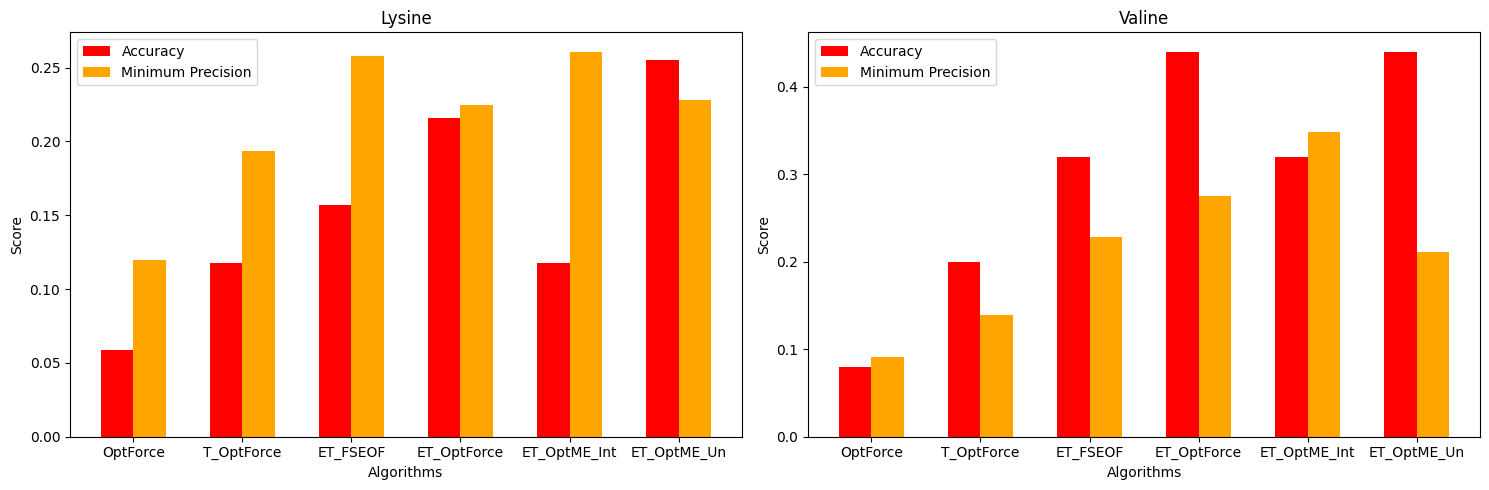

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# lys
N = 6 
Accuracy1 = [s_accuracy_lys, t_accuracy_lys,etf_accuracy_lys , et_accuracy_lys,etmi_accuracy_lys,etms_accuracy_lys]
Precision1 = [s_minprecison_lys,t_minprecison_lys,etf_minprecison_lys,et_minprecison_lys,etmi_minprecison_lys,erms_minprecision_lys]

# val
Accuracy2 = [s_accuracy_val, t_accuracy_val,etf_accuracy_val, et_accuracy_val,etmi_accuracy_val,etms_accuracy_val]
Precision2 = [s_minprecison_val, t_minprecison_val, etf_minprecison_val,et_minprecison_val,etmi_minprecison_val,erms_minprecision_val]


ind = np.arange(N) 
width = 0.3  

fig, axs = plt.subplots(1, 2, figsize=(15, 5))


for i, ax in enumerate(axs):
    if i == 0:
        Accuracy = Accuracy1
        Precision = Precision1
        title = 'Lysine'
    elif i == 1:
        Accuracy = Accuracy2
        Precision = Precision2
        title = 'Valine'
    elif i == 2:
        Accuracy = Accuracy3
        Precision = Precision3
        title = 'Isoleucine'

    rects1 = ax.bar(ind - width/2, Accuracy, width, color='red', label='Accuracy')
    rects2 = ax.bar(ind + width/2, Precision, width, color='orange', label='Minimum Precision')


    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(('OptForce', 'T_OptForce', 'ET_FSEOF', 'ET_OptForce','ET_OptME_Int','ET_OptME_Un'))  # 替换为对应的标签
    ax.legend()

plt.tight_layout()

plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/picture/accuracy_precision_comparison_lys_val.svg', format='svg')
plt.show()


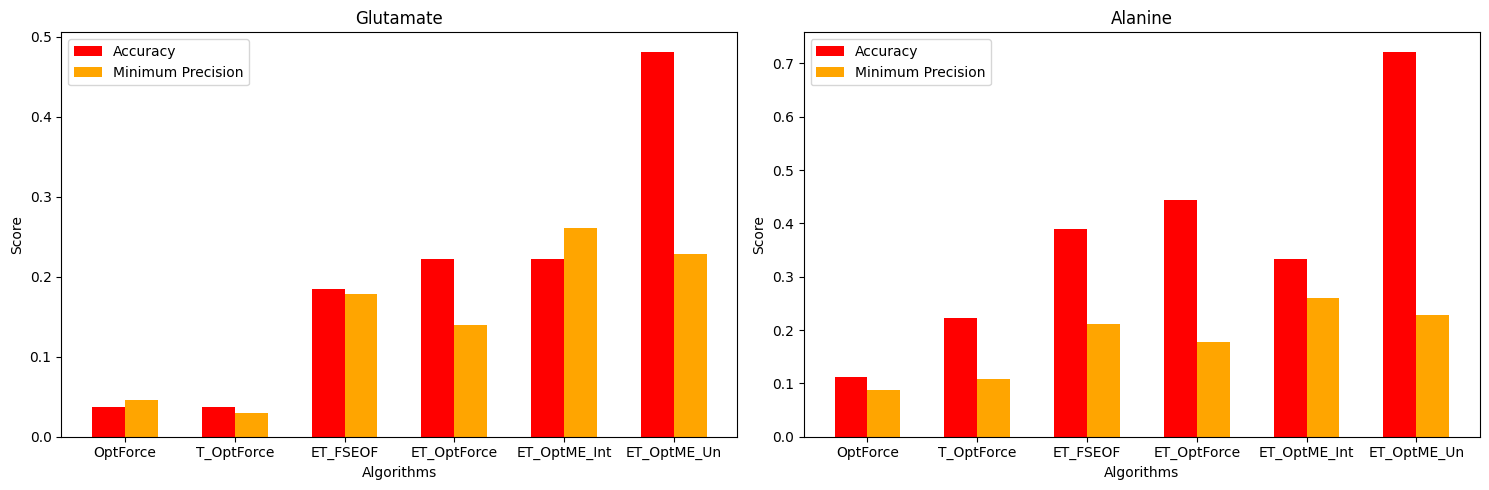

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# glu
N = 6  
Accuracy1 = [s_accuracy_glu,t_accuracy_glu, etf_accuracy_glu, et_accuracy_glu,etmi_accuracy_glu,etms_accuracy_glu]
Precision1 = [s_minprecison_glu, t_minprecison_glu, etf_minprecison_glu, et_minprecison_glu,etmi_minprecison_glu,erms_minprecision_glu]

# ala
Accuracy2 = [s_accuracy_ala, t_accuracy_ala, etf_accuracy_ala, et_accuracy_ala,etmi_accuracy_ala,etms_accuracy_ala]
Precision2 = [s_minprecison_ala,t_minprecison_ala, etf_minprecison_ala, et_minprecison_ala,etmi_minprecison_ala,erms_minprecision_ala]


ind = np.arange(N)  
width = 0.3 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i, ax in enumerate(axs):
    if i == 0:
        Accuracy = Accuracy1
        Precision = Precision1
        title = 'Glutamate'
    elif i == 1:
        Accuracy = Accuracy2
        Precision = Precision2
        title = 'Alanine'
    elif i == 2:
        Accuracy = Accuracy3
        Precision = Precision3
        title = 'Isoleucine'

    rects1 = ax.bar(ind - width/2, Accuracy, width, color='red', label='Accuracy')
    rects2 = ax.bar(ind + width/2, Precision, width, color='orange', label='Minimum Precision')

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(('OptForce', 'T_OptForce', 'ET_FSEOF', 'ET_OptForce','ET_OptME_Int','ET_OptME_Un'))  # 替换为对应的标签
    ax.legend()

plt.tight_layout()
plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/picture/accuracy_precision_comparison_glu_ala.svg', format='svg')
plt.show()

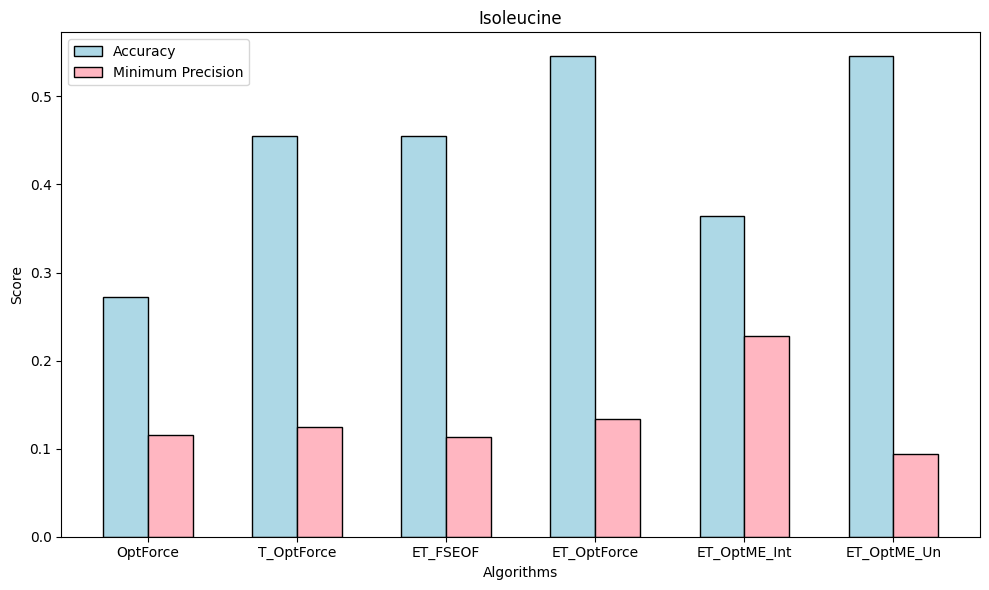

In [71]:
import numpy as np
import matplotlib.pyplot as plt
N = 6 
# ile
Accuracy = [s_accuracy_ile, t_accuracy_ile, etf_accuracy_ile, et_accuracy_ile, etmi_accuracy_ile, etms_accuracy_ile]
Precision = [s_minprecison_ile, t_minprecison_ile, etf_minprecison_ile, et_minprecison_ile, erms_minprecision_glu, erms_minprecision_ile]

ind = np.arange(N)
width = 0.3 
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind - width/2, Accuracy, width, color='lightblue', edgecolor='black', label='Accuracy')
rects2 = ax.bar(ind + width/2, Precision, width, color='lightpink', edgecolor='black', label='Minimum Precision')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('Isoleucine')
ax.set_xticks(ind)
ax.set_xticklabels(('OptForce', 'T_OptForce', 'ET_FSEOF', 'ET_OptForce', 'ET_OptME_Int','ET_OptME_Un'))
ax.legend()
plt.tight_layout()
plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/picture/accuracy_precision_comparison_ile.svg', format='svg')
plt.show()


In [70]:
# Consolidate the experimental strategies for the five products.
true_all = pd.concat([true_lysine, true_valine, true_glutamate, true_Isoleucine, true_Alanine], axis=0, ignore_index=True)

In [71]:
# A summary of the strategies involved in the experiment included in the predictions of the ET_OptForce algorithm for five products.
df_etoptforce_all = pd.concat([df_optforce, df_optforce_val, df_optforce_glu, df_optforce_ile, df_optforce_ala], axis=0, ignore_index=True)
df_etoptforce_allTP = df_etoptforce_all[(df_etoptforce_all['predict'] == 'TP')]
df_toptforce_all =  pd.concat([df_toptforce, df_toptforce_val, df_toptforce_glu, df_toptforce_ile, df_toptforce_ala], axis=0, ignore_index=True)
df_toptforce_allTP = df_toptforce_all[(df_toptforce_all['predict'] == 'TP')]
df_soptforce_all = pd.concat([df_soptforce, df_soptforce_val, df_soptforce_glu, df_soptforce_ile, df_soptforce_ala], axis=0, ignore_index=True)
df_soptforce_allTP = df_soptforce_all[(df_soptforce_all['predict'] == 'TP')]
df_etfseof_all = pd.concat([df_fseof, df_fseof_val, df_fseof_glu, df_fseof_ile, df_fseof_ala], axis=0, ignore_index=True)
df_etfseof_allTP = df_etfseof_all[(df_etfseof_all['predict'] == 'TP')]

In [72]:
df_sfseof_all = pd.concat([df_fseof_s, df_fseof_s_val, df_fseof_s_glu, df_fseof_s_ile, df_fseof_s_ala], axis=0, ignore_index=True)
df_sfseof_allTP = df_sfseof_all[(df_sfseof_all['predict'] == 'TP')]

In [73]:
df_stfseof_all = pd.concat([df_fseof_st, df_fseof_st_val, df_fseof_st_glu, df_fseof_st_ile, df_fseof_st_ala], ignore_index=True)
df_stfseof_allTP = df_stfseof_all[(df_stfseof_all['predict'] == 'TP')]

In [74]:

# Calculate the statistical count
alltrue = len(true_all)
all_target_et = len(df_etoptforce_all)
all_target_s = len(df_soptforce_all)
all_target_t = len(df_toptforce_all)
all_target_etf = len(df_etfseof_all)
all_target_stf = len(df_stfseof_all)
all_target_sf = len(df_sfseof_all)
tp_s = len(df_soptforce_allTP)
tp_t = len(df_toptforce_allTP)
tp_et = len(df_etoptforce_allTP)
tp_tf = len(df_etfseof_allTP)
tp_sf = len(df_sfseof_allTP)
tp_stf = len(df_stfseof_allTP)

In [75]:
# Calculate the performance metrics
et_minprecison = tp_et/all_target_et
# 0.17
etf_minprecison = tp_tf/all_target_etf
sf_minprecison = tp_sf/all_target_sf
stf_minprecison = tp_stf/all_target_stf
# # 0.03
t_minprecison = tp_t/all_target_t
# # 0.04
s_minprecison = tp_s/all_target_s
# # 0.22
et_accuracy = tp_et/alltrue
# 0.037
t_accuracy = tp_t/alltrue
# # 0.037
s_accuracy = tp_s/alltrue
etf_accuracy = tp_tf/alltrue
# # 0.185
sf_accuracy = tp_sf/alltrue
stf_accuracy = tp_stf/alltrue

In [76]:
df_etfseof_allTP

,gene,cond = 0.0,cond = 0.35,cond = 0.69,cond = 1.04,cond = 1.38,cond = 1.73,cond = 2.08,cond = 2.42,cond = 2.77,...,gene = 9.2,sum=1.02,sum=2.04,sum=3.07,sum=4.09,sum=5.11,sum=6.13,sum=7.16,sum=8.18,sum=9.2
14,Cgl1183,2.140289e-06,1.952981e-06,1.771024e-06,1.583715e-06,1.380999e-06,1.161899e-06,9.426721e-07,7.297090e-07,5.748895e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Cgl1183 and Cgl1184,5.117397e-06,4.669545e-06,4.234489e-06,3.786637e-06,3.301947e-06,2.778081e-06,2.253914e-06,1.744722e-06,1.080415e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Cgl2220,2.198746e-07,2.006322e-07,1.819395e-07,1.626970e-07,1.418718e-07,1.193633e-07,9.684189e-08,7.496392e-08,4.642124e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Cgl1271 and Cgl1272,1.651269e-06,1.506758e-06,1.366375e-06,1.221863e-06,1.065464e-06,8.964245e-07,7.272874e-07,5.629828e-07,3.486258e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Cgl0252,5.860616e-07,1.074585e-06,1.549151e-06,2.037674e-06,2.506556e-06,2.986374e-06,3.466158e-06,3.932233e-06,4.419549e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Cgl0251,5.271500e-06,9.665666e-06,1.393428e-05,1.832845e-05,2.254594e-05,2.686180e-05,3.117735e-05,3.536960e-05,3.975291e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Cgl1180,1.337613e-06,6.285597e-06,1.109221e-05,1.604019e-05,2.083383e-05,2.576195e-05,3.068998e-05,3.547722e-05,4.036862e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Cgl1971,1.412007e-07,5.624637e-07,9.716906e-07,1.392954e-06,1.800811e-06,2.219977e-06,2.639134e-06,3.046315e-06,3.461606e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Cgl0251,5.271500e-06,NaN,NaN,4.225948e-06,NaN,NaN,3.180396e-06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Cgl1183,2.140289e-06,NaN,NaN,1.715783e-06,NaN,NaN,1.291277e-06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
all_target_etf

171

In [78]:
tp_tf

33

In [79]:
s_accuracy

0.09090909090909091

In [80]:
sf_accuracy

0.23484848484848486

In [81]:
etf_accuracy

0.25

In [82]:
tp_sf

31

In [83]:
tp_tf

33

In [84]:
(et_accuracy - s_accuracy )/ s_accuracy

2.5

In [85]:
(t_minprecison-s_minprecison)/s_minprecison

0.1601123595505617

In [86]:
(et_minprecison-s_minprecison)/s_minprecison

0.8603603603603603

In [99]:
me = et_minprecison - sf_minprecison

In [100]:
me/et_minprecison

0.6350620426344258

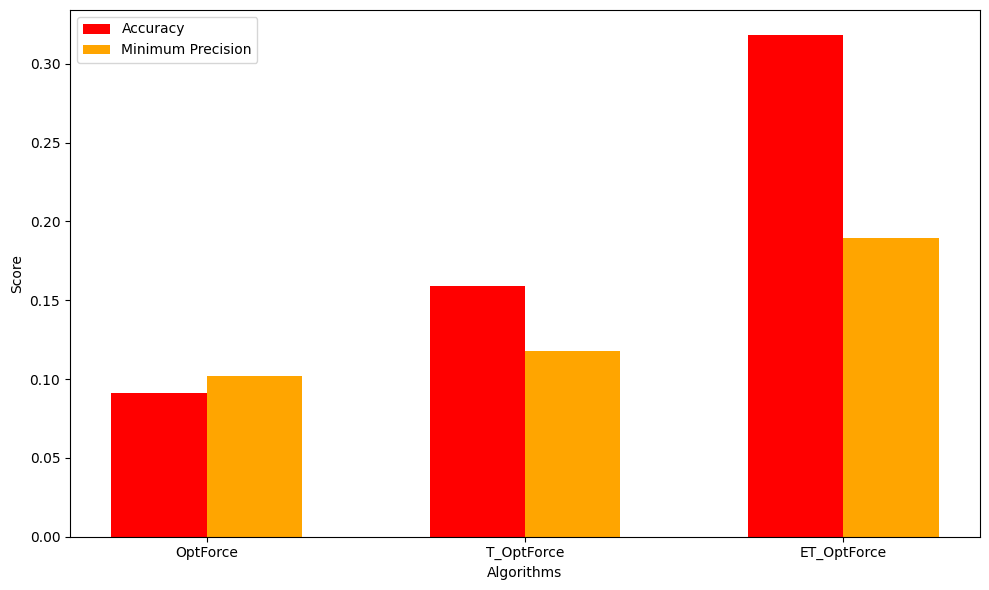

In [110]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
Accuracy = [s_accuracy, t_accuracy, et_accuracy]
Precision = [s_minprecison, t_minprecison,et_minprecison]

ind = np.arange(N) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(ind - width/2, Accuracy, width, color='red', label='Accuracy')
rects2 = ax.bar(ind + width/2, Precision, width, color='orange', label='Minimum Precision')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('OptForce', 'T_OptForce', 'ET_OptForce'))
ax.legend()
plt.tight_layout()
plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/accuracy_precision_comparisonall8.23.svg', format='svg')
plt.show()

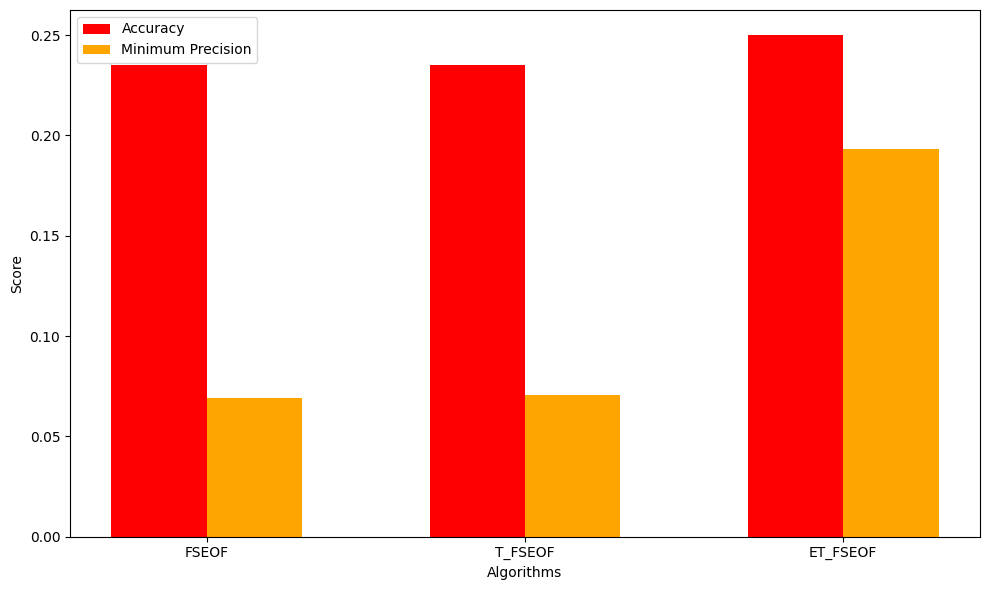

In [112]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
Accuracy = [sf_accuracy,stf_accuracy, etf_accuracy]
Precision = [sf_minprecison,stf_minprecison, etf_minprecison]

ind = np.arange(N) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(ind - width/2, Accuracy, width, color='red', label='Accuracy')
rects2 = ax.bar(ind + width/2, Precision, width, color='orange', label='Minimum Precision')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('FSEOF','T_FSEOF','ET_FSEOF'))
ax.legend()
plt.tight_layout()
plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/accuracy_precision_comparisonall8.28.svg', format='svg')
plt.show()


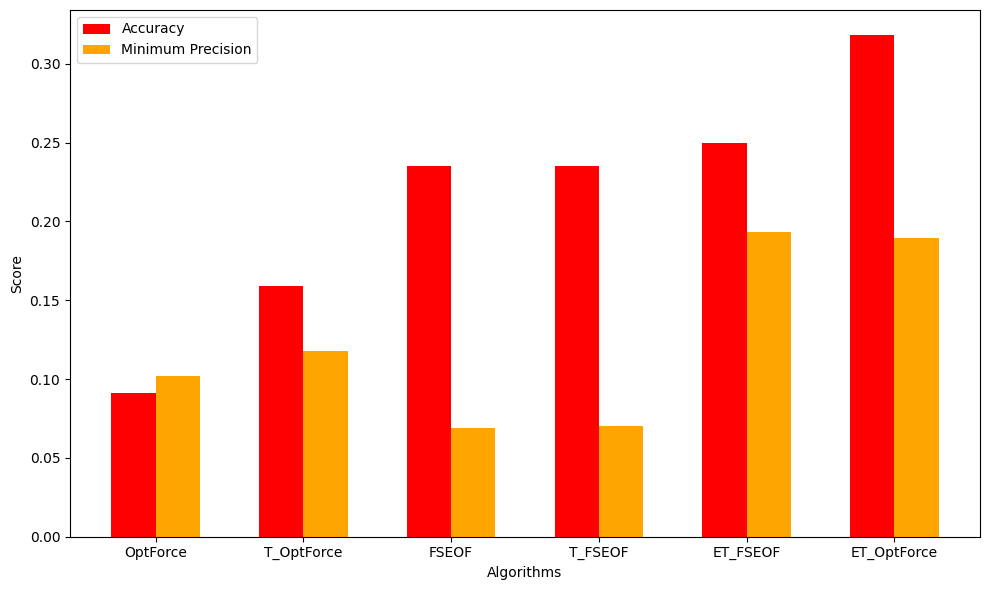

In [113]:
import numpy as np
import matplotlib.pyplot as plt

N = 6
Accuracy = [s_accuracy, t_accuracy,sf_accuracy,stf_accuracy, etf_accuracy, et_accuracy]
Precision = [s_minprecison, t_minprecison,sf_minprecison,stf_minprecison, etf_minprecison, et_minprecison]

ind = np.arange(N) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(ind - width/2, Accuracy, width, color='red', label='Accuracy')
rects2 = ax.bar(ind + width/2, Precision, width, color='orange', label='Minimum Precision')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('OptForce', 'T_OptForce','FSEOF','T_FSEOF','ET_FSEOF', 'ET_OptForce'))
ax.legend()
plt.tight_layout()
plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/accuracy_precision_comparisonall8.23.svg', format='svg')
plt.show()


In [88]:
df_inter_all = pd.concat([result_lysdf, result_valdf, result_gludf, result_iledf, result_aladf], axis=0, ignore_index=True)
df_inter_all_TP = pd.concat([TP_result_lysdf,TP_result_valdf,TP_result_gludf,TP_result_iledf,TP_result_aladf],axis=0, ignore_index=True)
df_sum_all = pd.concat([sum_lysdf,sum_valdf,sum_gludf,sum_iledf,sum_aladf],axis=0, ignore_index=True)
df_sum_TP = pd.concat([TP_sum_lysdf,TP_sum_valdf,TP_sum_gludf,TP_sum_iledf,TP_sum_aladf],axis=0, ignore_index=True)

In [89]:
df_inter_all_TP

,gene,predict_fseof,enzyme_fseof,predict_optforce,manipulations_optforce,manipulations_fseof
0,Cgl1183,TP,hom#thrA,TP,down,down
1,Cgl1183 and Cgl1184,TP,"hom#thrA, thrB",TP,down,down
2,Cgl1271 and Cgl1272,TP,"ilvB, ilvN",TP,down,down
3,Cgl0252,TP,asd,TP,Up,up
4,Cgl0251,TP,lysC,TP,Up,up
5,Cgl1971,TP,dapA,TP,Up,up
6,Cgl0251,TP,lysC,TP,down,down
7,Cgl1183,TP,hom#thrA,TP,down,down
8,Cgl1183 and Cgl1184,TP,"hom#thrA, thrB",TP,down,down
9,Cgl2204,TP,ilvE,TP,down,down


In [91]:
TP_intersection = len(df_inter_all_TP)
all_intersection = len(df_inter_all)
all_sum = len(df_sum_all)
TP_sum = len(df_sum_TP)

In [92]:
etmi_accuracy = TP_intersection/alltrue
etmi_minprecison = TP_intersection/all_intersection
etms_accuracy = TP_sum/alltrue
erms_minprecision = TP_sum/all_sum

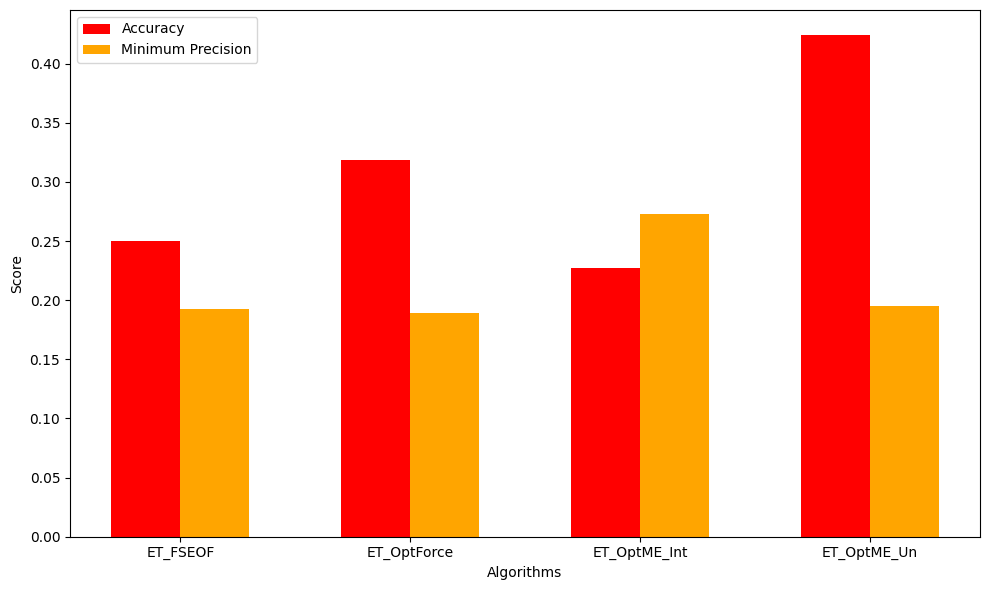

In [94]:
import numpy as np
import matplotlib.pyplot as plt
N = 4  
Accuracy = [etf_accuracy, et_accuracy,etmi_accuracy,etms_accuracy]
Precision = [etf_minprecison, et_minprecison,etmi_minprecison,erms_minprecision]

ind = np.arange(N) 
width = 0.3 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind - width/2, Accuracy, width, color='red', label='Accuracy')
rects2 = ax.bar(ind + width/2, Precision, width, color='orange', label='Minimum Precision')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('ET_FSEOF', 'ET_OptForce', 'ET_OptME_Int', 'ET_OptME_Un'))
ax.legend()
plt.tight_layout()
plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/accuracy_precision_comparisonint.svg', format='svg')
plt.show()


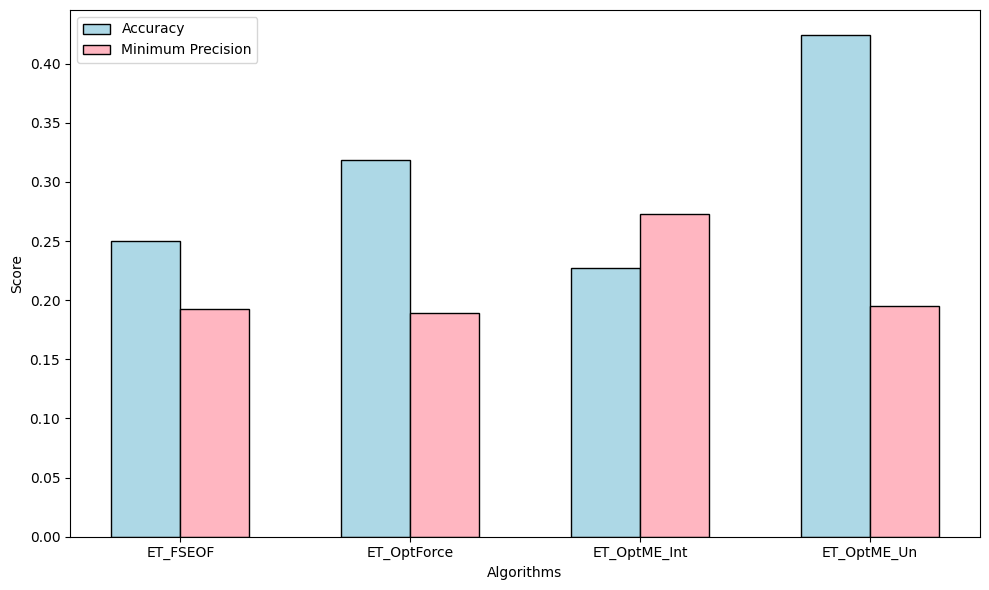

In [95]:
import numpy as np
import matplotlib.pyplot as plt

N = 4  
Accuracy = [etf_accuracy, et_accuracy, etmi_accuracy, etms_accuracy]
Precision = [etf_minprecison, et_minprecison, etmi_minprecison, erms_minprecision]

ind = np.arange(N) 
width = 0.3 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind - width/2, Accuracy, width, color='lightblue', edgecolor='black', label='Accuracy')
rects2 = ax.bar(ind + width/2, Precision, width, color='lightpink', edgecolor='black', label='Minimum Precision')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('ET_FSEOF', 'ET_OptForce', 'ET_OptME_Int', 'ET_OptME_Un'))
ax.legend()

plt.tight_layout()
plt.savefig('/home/sun/ETGEMS-10.20/ET_OptME/result/accuracy_precision_comparisonint.svg', format='svg')
plt.show()


In [106]:
(etms_accuracy - et_accuracy) / et_accuracy

0.33333333333333337